## PCA (analisis de componentes principales)

**PCA (Análisis de Componentes Principales)**

**es una técnica de reducción de dimensionalidad que se utiliza para identificar patrones en los datos, al mismo tiempo que reduce la cantidad de variables originales.**

- Reducción de dimensionalidad: PCA reduce la dimensionalidad de un conjunto de datos conservando la mayor cantidad posible de variabilidad. Esto se logra proyectando los datos originales en un nuevo conjunto de ejes, llamados componentes principales, que son combinaciones lineales de las variables originales.

- Identificación de patrones: Al proyectar los datos en un espacio de menor dimensión, PCA permite identificar patrones subyacentes en los datos que pueden no ser evidentes en las variables originales.

- Eliminación de la multicolinealidad: PCA puede ser útil cuando hay multicolinealidad entre las variables originales, ya que los componentes principales son ortogonales entre sí, lo que significa que no están correlacionados.

- Visualización de datos: PCA se utiliza a menudo para visualizar datos de alta dimensionalidad en un espacio de menor dimensión (por ejemplo, 2D o 3D) con el fin de entender la estructura de los datos y detectar agrupaciones o patrones.

- Preprocesamiento de datos: PCA es una herramienta útil para el preprocesamiento de datos antes de aplicar algoritmos de aprendizaje automático, ya que puede reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

- Interpretación de componentes principales: Cada componente principal captura una cierta cantidad de variabilidad en los datos. Estos componentes se pueden interpretar para entender qué variables contribuyen más a la variabilidad en los datos.

El PCA busca maximizar la varianza de las componentes principales, lo que significa que las primeras componentes principales retienen la mayor cantidad de información posible sobre la estructura de los datos. Esto permite reducir la dimensionalidad de los datos manteniendo la mayor parte de la variabilidad original.


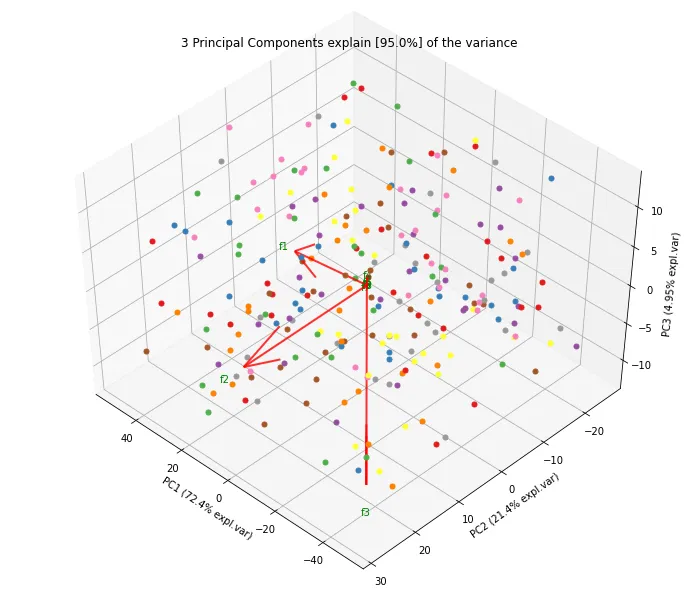



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 

**Crear dataframe**

load_brast_cancer: contiene características numéricas que describen diversas propiedades de las células mamarias, que se utilizan para predecir si una muestra de células es benigna o maligna.

In [32]:
df_cancer = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Info del dataframe**

In [33]:
df_cancer.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [34]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**Estandarizar caracteristicas**

- StandardScaler: es una técnica de preprocesamiento de datos utilizada para estandarizar las características de un conjunto de datos, lo que significa que transforma las características de manera que tengan una media de cero y una desviación estándar de uno.


- Proceso: para cada característica, StandardScaler calcula la media y la desviación estándar de todos los valores de esa característica en el conjunto de datos.
Luego, cada valor en la característica se transforma restando la media y dividiendo por la desviación estándar.


- Objetivo: centrar los datos alrededor de cero, lo que significa que la media de los datos transformados es cero.
Escalar la dispersión de los datos para que tengan una varianza unitaria, lo que facilita la comparación entre diferentes características.

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [37]:
ss = ss.fit_transform(df_cancer)
ss

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

**Aplicar PCA (2 dimensiones)**

In [38]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)


In [39]:
pca2 = pca2.fit_transform(ss)
pca2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

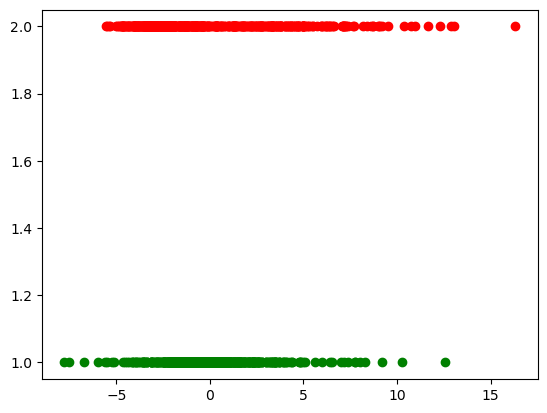

In [41]:
plt.scatter(pca2[:,0], [2]*pca2[:,0].size, c='r')
plt.scatter(pca2[:,1], [1]*pca2[:,1].size, c='g')
plt.show()

**Aplicar PCA (3 dimensiones)**

In [42]:
pca3 = PCA(n_components=3)
pca3 = pca3.fit_transform(ss)

In [43]:
pca3

array([[ 9.19283682,  1.94858382, -1.12316889],
       [ 2.38780179, -3.76817115, -0.52929617],
       [ 5.73389628, -1.07517391, -0.55174766],
       ...,
       [ 1.25617928, -1.90229699,  0.5627318 ],
       [10.37479407,  1.67200975, -1.87702745],
       [-5.47524331, -0.67063587,  1.49043849]])

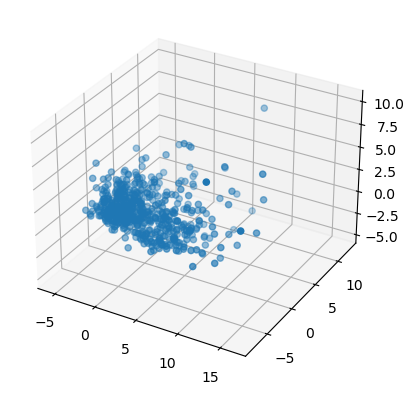

In [50]:
figure = plt.figure()

ax = figure.add_subplot(111 , projection='3d')

x = pca3[:,0]
y = pca3[:,1]
z = pca3[:,2]

ax.scatter(x,y,z, marker='o')
plt.show()